In [1]:
import numpy as np
import pyuvdata
import matplotlib.pyplot as plt

In [2]:
cal_vanilla = pyuvdata.UVCal()
cal_vanilla.read_calfits('/Users/ruby/Astro/caltest_Mar14/vanilla_cal.calfits')
cal_dw = pyuvdata.UVCal()
cal_dw.read_calfits('/Users/ruby/Astro/caltest_Mar14/wedge_excluded.calfits')

telescope_location is not set. Using known values for mwa.


In [11]:
def plot_gains_per_freq(cal):
    for ant_ind in range(cal.Nants_data):
        plt.plot(np.squeeze(cal.freq_array)/1e6, np.abs(cal.gain_array[ant_ind,0,:,0,0]))
        plt.xlim([np.min(cal.freq_array)/1e6, np.max(cal.freq_array)/1e6])
        plt.ylim([1-.08,1+.08])
        plt.xlabel('Frequency (MHz)')
        plt.ylabel('Gain Amplitude')
    plt.plot([np.min(cal.freq_array)/1e6, np.max(cal.freq_array)/1e6], [1,1], color='white', linestyle='--', linewidth=0.9)
    plt.show()
    
def plot_gains_delay(cal):
    delay_array = np.fft.fftfreq(cal.Nfreqs, d=cal.channel_width)
    delay_array = np.fft.fftshift(delay_array)
    for ant_ind in range(cal.Nants_data):
        gains_fft = np.fft.fftshift(np.fft.fft(cal.gain_array[ant_ind,0,:,0,0]-1))
        plt.plot(delay_array, np.abs(gains_fft))
    plt.ylim([0,5])
    plt.xlabel('Delay (s)')
    plt.ylabel('Gain Error Amp.')
    plt.show()

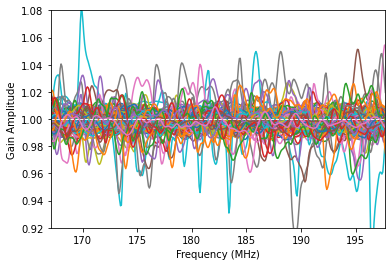

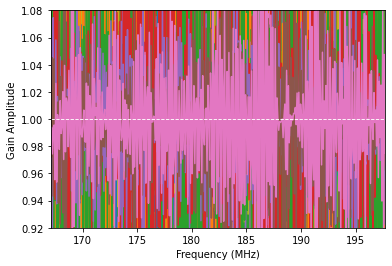

In [9]:
plot_gains_per_freq(cal_vanilla)
plot_gains_per_freq(cal_dw)

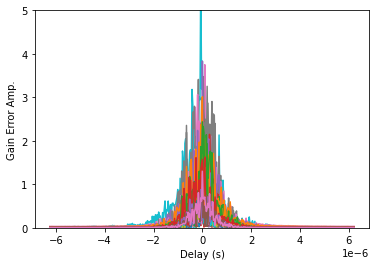

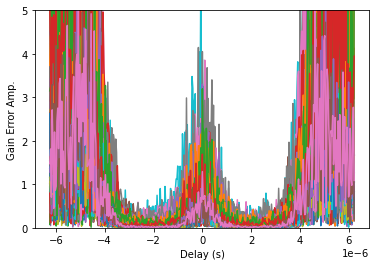

In [12]:
plot_gains_delay(cal_vanilla)
plot_gains_delay(cal_dw)